<a href="https://colab.research.google.com/github/Vikaas1517/Data-Analysis/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.info()
data.describe()
data.isnull().sum()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Descriptive Statistics:

Missing Values:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Generating Histograms for all features:


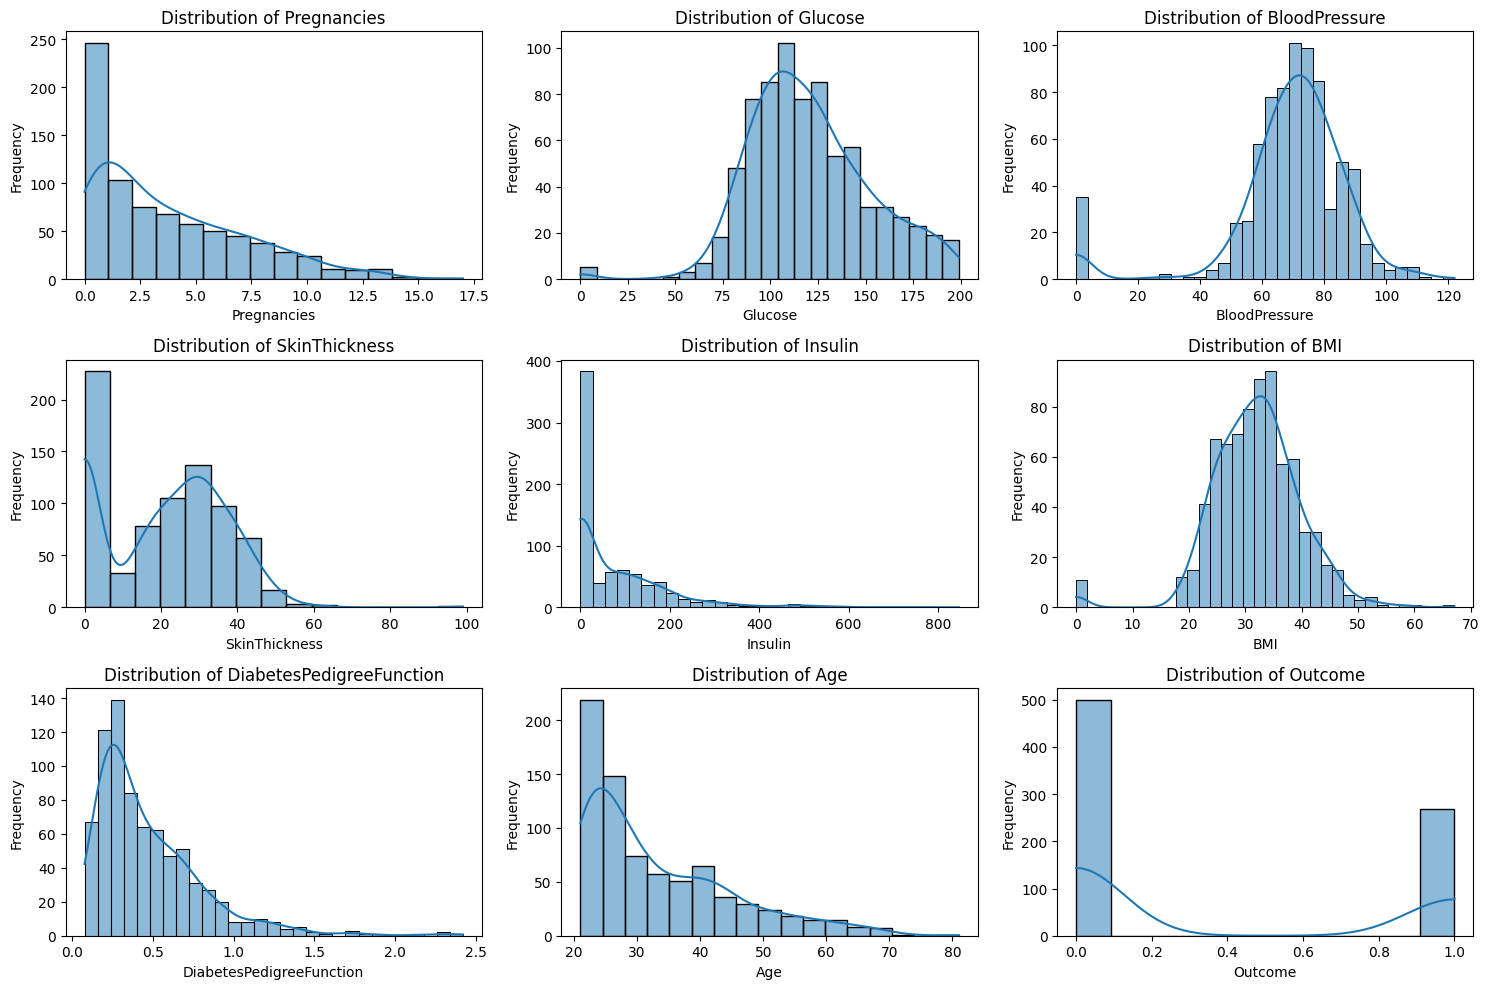

In [7]:
import seaborn as sns

print("Generating Histograms for all features:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Generating Box Plots for numerical features against Outcome:


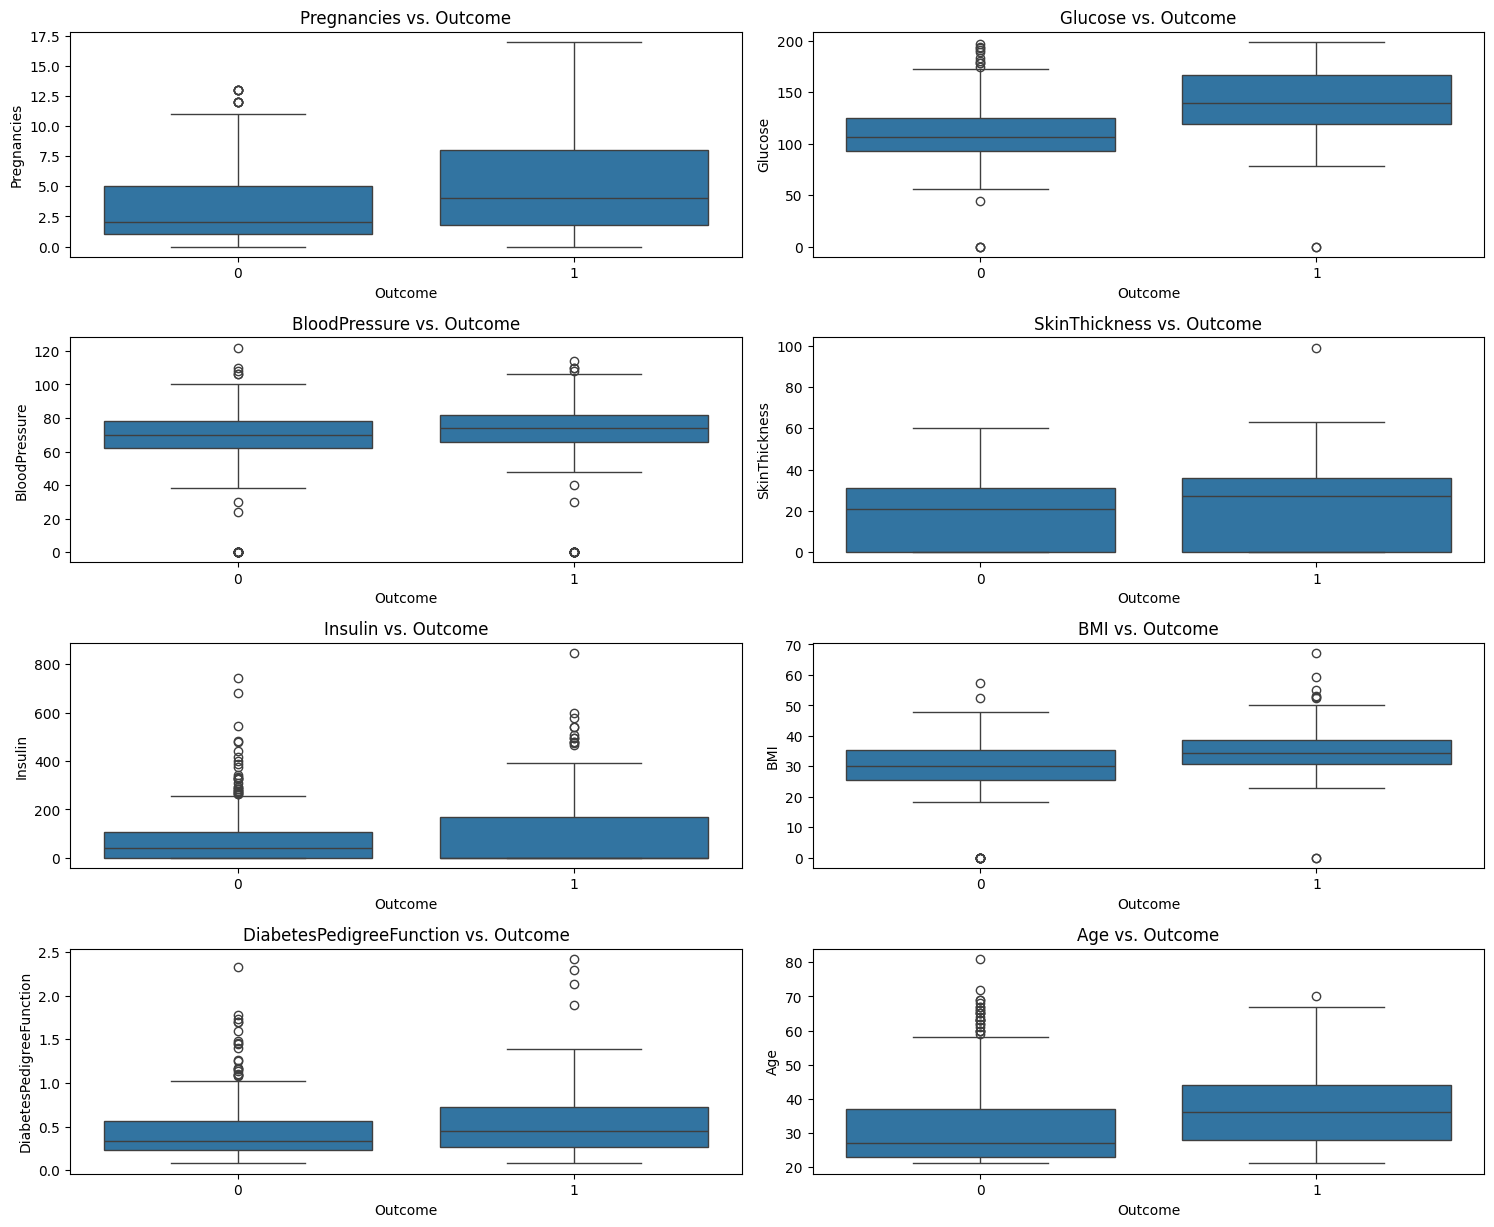

In [8]:
print("Generating Box Plots for numerical features against Outcome:")
plt.figure(figsize=(15, 15))

# Get numerical columns excluding 'Outcome'
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'Outcome' in numerical_cols:
    numerical_cols.remove('Outcome')

for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1) # Adjust subplot grid dynamically
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'{column} vs. Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

Generating Correlation Heatmap:


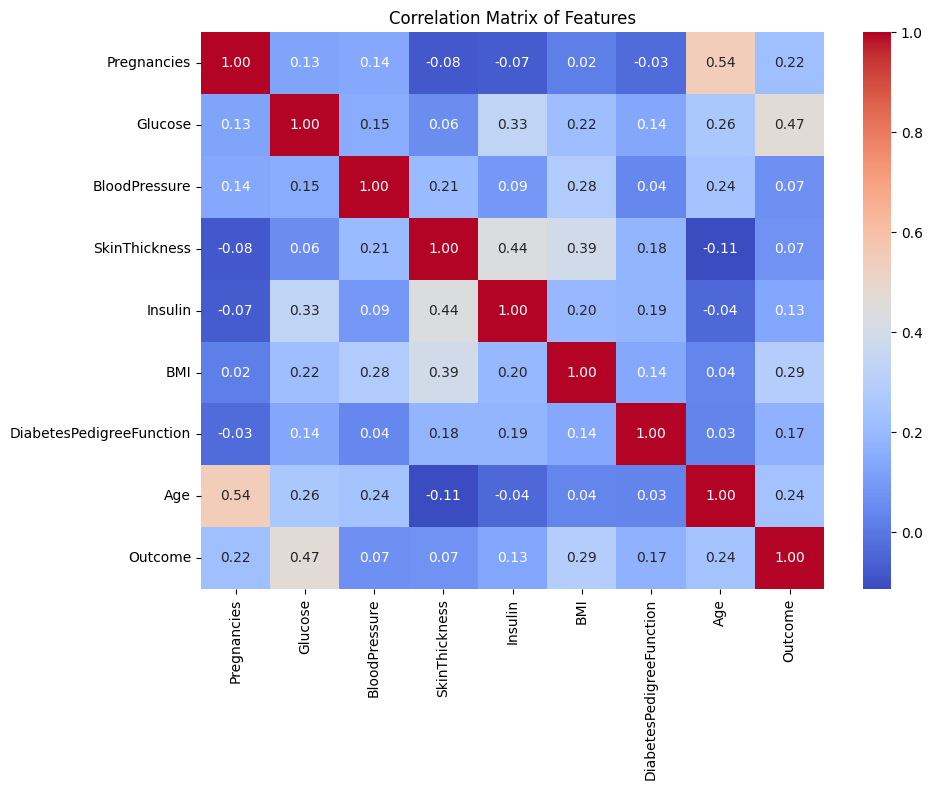

In [9]:
print("Generating Correlation Heatmap:")
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [10]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

print("Features (X) head:")
print(X.head())
print("\nTarget (Y) head:")
print(Y.head())

Features (X) head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target (Y) head:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of Y_train: (614,)
Shape of Y_test: (154,)


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, Y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Y_pred = dtc.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

cm = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.7468
Precision: 0.6250
Recall: 0.7273
F1-Score: 0.6723

Confusion Matrix:
 [[75 24]
 [15 40]]


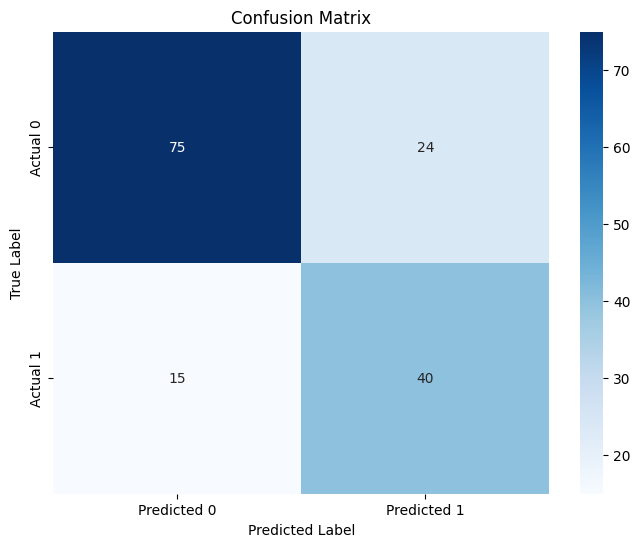

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.tree import export_graphviz
import graphviz

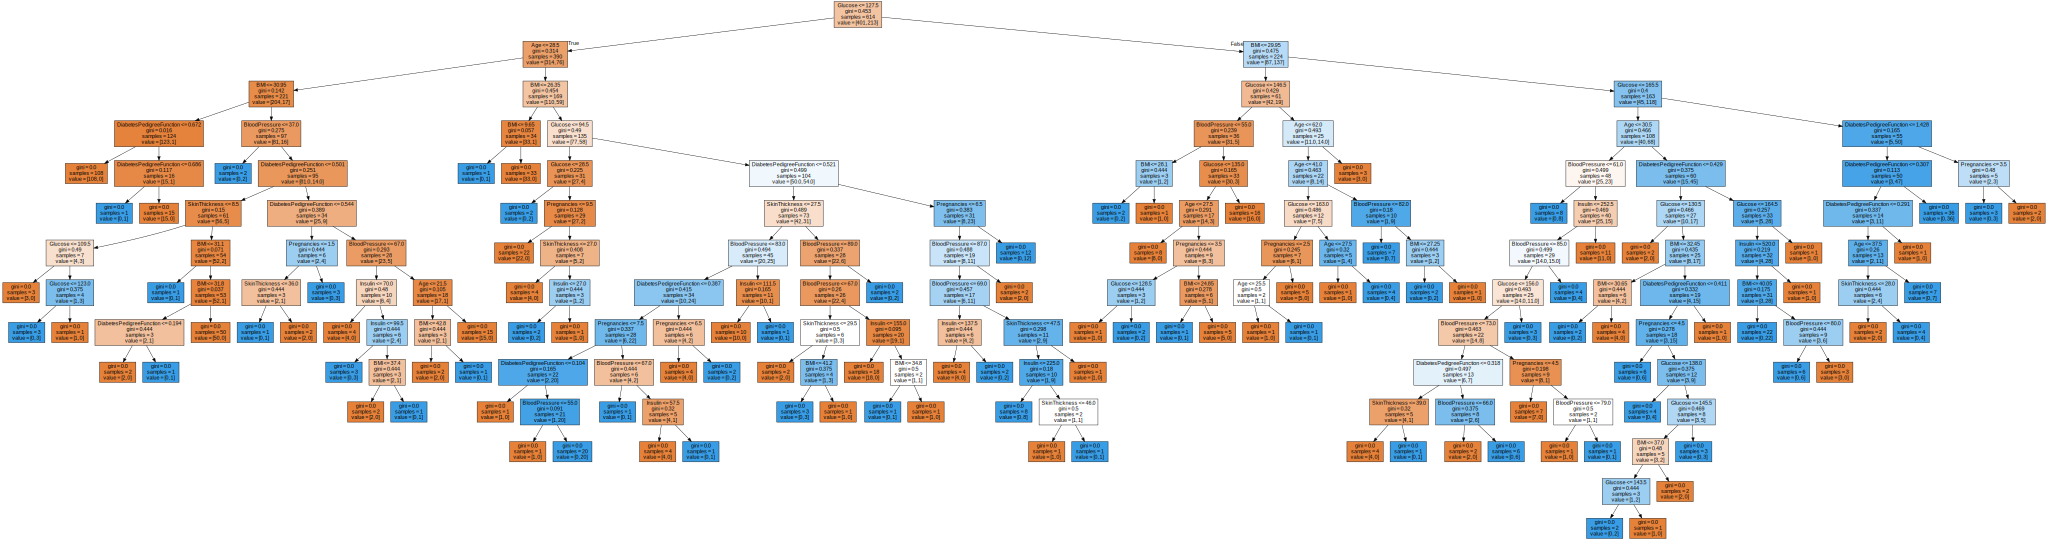

In [20]:
dot_data = export_graphviz(dtc, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph